In [125]:
from PIL import Image
import os
import cv2
import pandas as pd

def calculate_image_stats(image_path):
    # Vérifier si le fichier est une image
    image_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tif']
    if not any(image_path.lower().endswith(ext) for ext in image_extensions):
        print(f"Ignoré le fichier non pris en charge : {image_path}")
        return None

    # Charger l'image
    img = cv2.imread(image_path)

    if img is None:
        print(f"Erreur de lecture de l'image : {image_path}")
        return None

    # Obtenir les dimensions de l'image (hauteur et largeur)
    height, width, _ = img.shape

    # Obtenir le format à partir de l'extension du fichier
    img_format = os.path.splitext(image_path)[1]

    # Convertir l'image en niveaux de gris
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Calculer la luminosité moyenne
    mean_brightness = gray.mean()
    
    # Convertir l'image en espace de couleur HSV
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # Extraire la composante de teinte (Hue)
    hue = hsv_img[:, :, 0]
    # Calculer la teinte moyenne
    mean_hue = hue.mean()

    # Extraire le dataset de l'image à partir du chemin
    dataset = os.path.basename(os.path.dirname(os.path.dirname(image_path))) 

    # Extraire le diagnostic à partir du nom de l'image ('1' ou '0' en dernier caractère)
    diagnostic = os.path.splitext(os.path.basename(image_path))[0][-1]

    return  dataset, diagnostic, height, width, img_format, mean_brightness, mean_hue

def create_dataframe(root_dir):
    data = []

    for root, dirs, files in os.walk(root_dir):
        for file in files:
            img_path = os.path.join(root, file)
            image_stats = calculate_image_stats(img_path)

            if image_stats:
                data.append([img_path] + list(image_stats))

    df = pd.DataFrame(data, columns=['img_path', 'dataset', 'diagnostic', 'height', 'width', 'format', 'mean_brightness', 'mean_hue'])
    return df

root_directory = "ALL_IDB"
df = create_dataframe(root_directory)

# Afficher le DataFrame
df.head()



Ignoré le fichier non pris en charge : ALL_IDB\ALL_IDB1\ALL_IDB1\readme_ALL_IDB1.txt
Ignoré le fichier non pris en charge : ALL_IDB\ALL_IDB1\ALL_IDB1\xyc\Im001_1.xyc
Ignoré le fichier non pris en charge : ALL_IDB\ALL_IDB1\ALL_IDB1\xyc\Im002_1.xyc
Ignoré le fichier non pris en charge : ALL_IDB\ALL_IDB1\ALL_IDB1\xyc\Im003_1.xyc
Ignoré le fichier non pris en charge : ALL_IDB\ALL_IDB1\ALL_IDB1\xyc\Im004_1.xyc
Ignoré le fichier non pris en charge : ALL_IDB\ALL_IDB1\ALL_IDB1\xyc\Im005_1.xyc
Ignoré le fichier non pris en charge : ALL_IDB\ALL_IDB1\ALL_IDB1\xyc\Im006_1.xyc
Ignoré le fichier non pris en charge : ALL_IDB\ALL_IDB1\ALL_IDB1\xyc\Im007_1.xyc
Ignoré le fichier non pris en charge : ALL_IDB\ALL_IDB1\ALL_IDB1\xyc\Im008_1.xyc
Ignoré le fichier non pris en charge : ALL_IDB\ALL_IDB1\ALL_IDB1\xyc\Im009_1.xyc
Ignoré le fichier non pris en charge : ALL_IDB\ALL_IDB1\ALL_IDB1\xyc\Im010_1.xyc
Ignoré le fichier non pris en charge : ALL_IDB\ALL_IDB1\ALL_IDB1\xyc\Im011_1.xyc
Ignoré le fichier non pr

,img_path,dataset,diagnostic,height,width,format,mean_brightness,mean_hue
0,ALL_IDB\ALL_IDB1\ALL_IDB1\im\Im001_1.jpg,ALL_IDB1,1,1368,1712,.jpg,145.034146,86.744511
1,ALL_IDB\ALL_IDB1\ALL_IDB1\im\Im002_1.jpg,ALL_IDB1,1,1368,1712,.jpg,141.622415,96.973916
2,ALL_IDB\ALL_IDB1\ALL_IDB1\im\Im003_1.jpg,ALL_IDB1,1,1368,1712,.jpg,142.288550,94.330912
3,ALL_IDB\ALL_IDB1\ALL_IDB1\im\Im004_1.jpg,ALL_IDB1,1,1368,1712,.jpg,138.196909,89.780578
4,ALL_IDB\ALL_IDB1\ALL_IDB1\im\Im005_1.jpg,ALL_IDB1,1,1368,1712,.jpg,144.365016,110.769000


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   img_path         368 non-null    object 
 1   dataset          368 non-null    object 
 2   diagnostic       368 non-null    object 
 3   height           368 non-null    int64  
 4   width            368 non-null    int64  
 5   format           368 non-null    object 
 6   mean_brightness  368 non-null    float64
 7   mean_hue         368 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 23.1+ KB


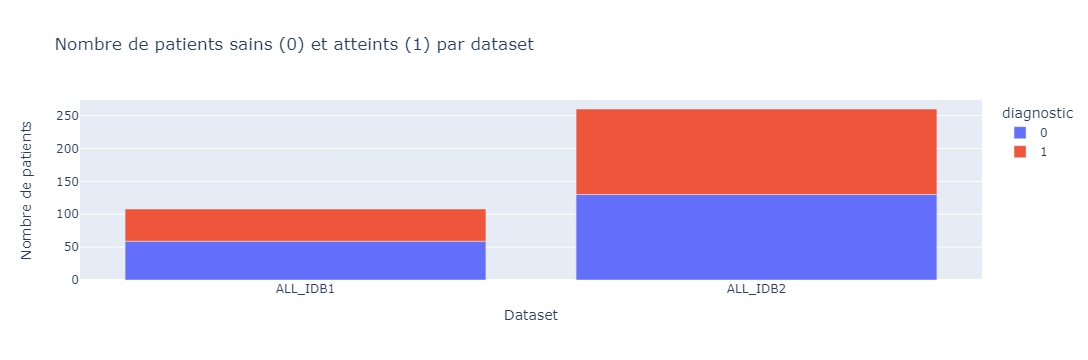

In [105]:
import plotly.express as px

# Regrouper les données par dataset et diagnostic, puis compter le nombre de patients
grouped = df.groupby(['dataset', 'diagnostic']).size().reset_index(name='count')

# Créer un graphique interactif en utilisant Plotly Express
fig = px.bar(grouped, x='dataset', y='count', color='diagnostic',
             labels={'dataset': 'Dataset', 'count': 'Nombre de patients'},
             title="Nombre de patients sains (0) et atteints (1) par dataset")
fig.show()


In [106]:
print("Nombre d'occurences pour chaque valeur de 'width' :\n", df['width'].value_counts())
print("Nombre d'occurences pour chaque valeur de 'height' :\n", df['height'].value_counts())

Nombre d'occurences pour chaque valeur de 'width' :
 width
257     257
2592     74
1712     33
1226      1
193       1
196       1
232       1
Name: count, dtype: int64
Nombre d'occurences pour chaque valeur de 'height' :
 height
257     253
1944     74
1368     33
253       2
652       1
256       1
235       1
232       1
220       1
214       1
Name: count, dtype: int64


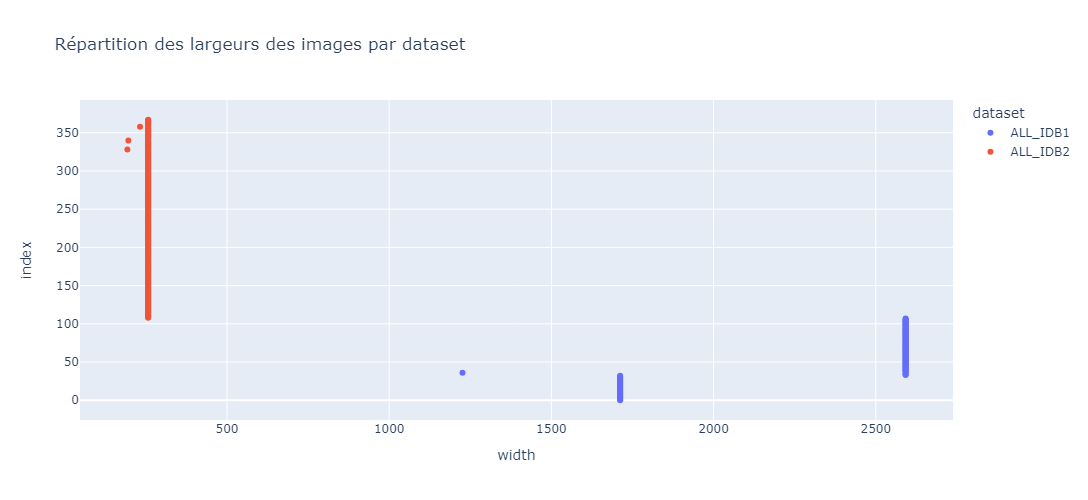

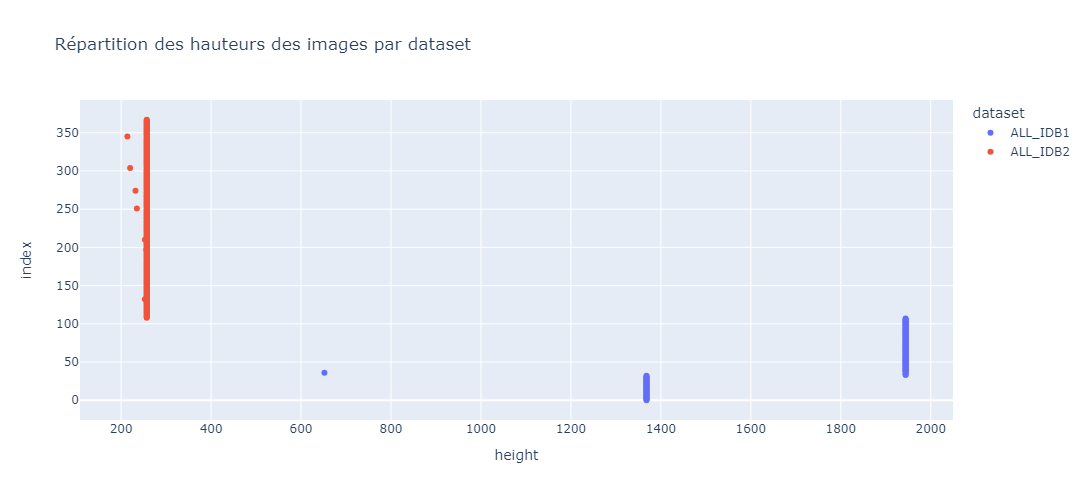

In [129]:
# Créer un scatter plot interactif pour la largeur (width) en différenciant par le dataset
fig_width = px.scatter(df, x='width', color='dataset', title="Répartition des largeurs des images par dataset")

# Créer un scatter plot interactif pour la hauteur (height) en différenciant par le dataset
fig_height = px.scatter(df, x='height', color='dataset', title="Répartition des hauteurs des images par dataset")
fig_width.update_layout(width=500, height=500)
fig_height.update_layout(width=500, height=500)
fig_width.show()
fig_height.show()


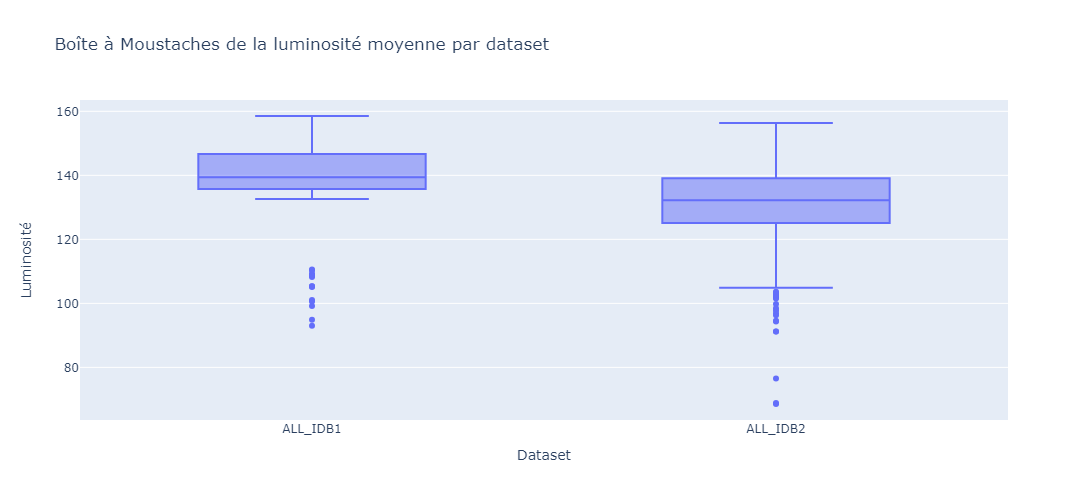

In [128]:
import plotly.express as px

# Créez un graphique interactif de boîte (box plot) pour la luminosité en fonction du dataset
fig_box = px.box(df, x='dataset', y='mean_brightness', title="Boîte à Moustaches de la luminosité moyenne par dataset",
                labels={'mean_brightness': 'Luminosité', 'dataset': 'Dataset'},
                hover_data=['img_path'])  # Ajoutez 'img_path' à hover_data

# Mettez à jour la taille du graphique
fig_box.update_layout(width=800, height=500)

# Affichez le graphique interactif de la boîte à moustaches
fig_box.show()



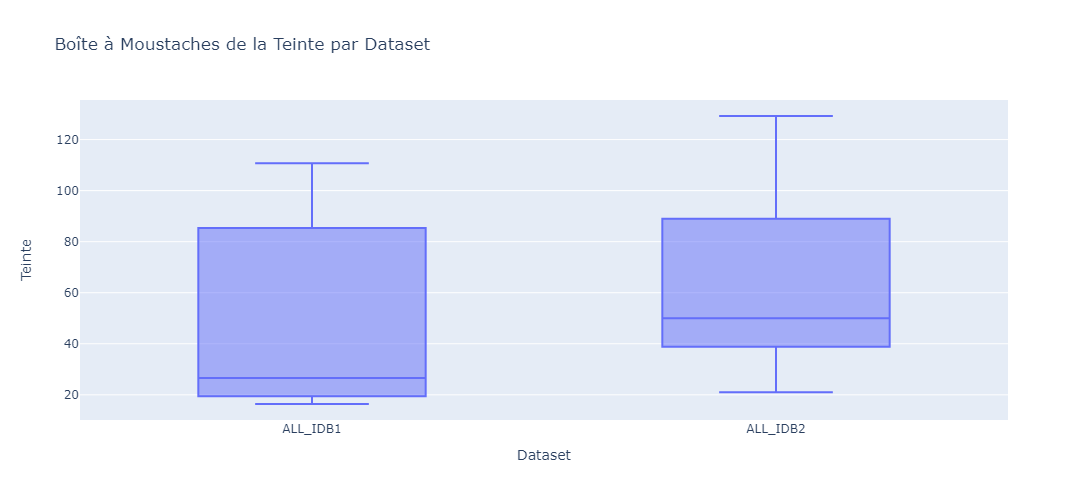

In [124]:
# Créez un graphique interactif de boîte (box plot) pour la teinte en fonction du dataset
fig_box = px.box(df, x='dataset', y='mean_hue', title="Boîte à Moustaches de la Teinte par Dataset",
                labels={'mean_hue': 'Teinte', 'dataset': 'Dataset'},
                hover_data=['img_path'])  # Ajoutez 'img_path' à hover_data

# Mettez à jour la taille du graphique
fig_box.update_layout(width=800, height=500)

# Affichez le graphique interactif de la boîte à moustaches
fig_box.show()